In [1]:
import numpy as np
import pandas as pd
import os

unifi = pd.read_csv("unififull.csv")
unifi.head()
unifi.dtypes

UserName     object
Handle       object
Timestamp    object
Text         object
dtype: object

In [2]:
cleandataset = pd.read_csv("Twitter_Data.csv")
cleandataset.dropna(axis=0, inplace=True)
cleandataset.isnull().sum()

clean_text    0
category      0
dtype: int64

In [3]:
unifi.isnull().sum()

UserName     38
Handle        1
Timestamp     0
Text          0
dtype: int64

In [38]:
celcom = pd.read_csv("celcomfull.csv")
#celcom

In [12]:
celcom.isnull().sum()

UserName     161
Handle        11
Timestamp      0
Text           0
dtype: int64

In [39]:
maxis = pd.read_csv("maxisfull.csv")
#maxis

In [9]:
maxis.isnull().sum()

UserName     32
Handle        2
Timestamp     0
Text          0
dtype: int64

In [8]:
umobile = pd.read_csv("umobilefull.csv")
#umobile

In [10]:
umobile.isnull().sum()

UserName     7
Handle       0
Timestamp    0
Text         0
dtype: int64

In [37]:
digi = pd.read_csv("digifull.csv")
#digi

In [11]:
digi.isnull().sum()

UserName     14
Handle        0
Timestamp     0
Text          0
dtype: int64

In [3]:
urlPattern = "((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
numberletterPattern = '[^A-Za-z0-9]+'
sw = ['eplying','replying','unifi','helpmeunifi','digitelco','celcom','umobile','maxis','maxislistens','digi']
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def process_tweets(tweet):
    # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    
    # Removing all URls 
    tweet = re.sub(urlPattern,' ',tweet)
    # Removing all numbers and letters
    tweet = re.sub(numberletterPattern,' ', tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,' ', tweet) 
    # Remove punctuations
    tweet = tweet.translate(str.maketrans("","",punctuation))
    # tokenizing words
    tokens = word_tokenize(tweet)
    # Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    # removing extra stopwords
    final_tokens = [w for w in tokens if w not in sw]
    # apply stemming
    #final_tokens = [SnowballStemmer('english').stem(w) for w in final_tokens]
    # reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)
    #return final_tokens

In [9]:
digi['processed_tweets'] = digi['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [91]:
nombor = 500
print("\nOriginal tweet ->", unifi['Text'][nombor])
print("\nProcessed tweet ->", process_tweets(unifi['Text'][nombor]))



Original tweet -> @unifi
 @helpmeunifi
  Check out my Speedtest results! 2.0 Mbps down and 6.2 Mbps up. How do your speeds compare? http://speedtest.tm.com.my

Processed tweet -> check out my speedtest result mbps down and mbps up how do your speed compare


In [4]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt 

def wordCloud(tweet) :
    # combining the image with the dataset
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

    # We use the ImageColorGenerator library from Wordcloud 
    # Here we take the color of the image and impose it over our wordcloud
    image_colors = ImageColorGenerator(Mask)

    # Now we use the WordCloud function from the wordcloud library 
    wc = WordCloud(background_color='black', height=1600, width=4000,mask=Mask).generate(" ".join(tweet.processed_tweets))
    #join(data[data.polarity == 0].processed_tweets)

    # Size of the image generated 
    plt.figure(figsize=(10,20))

    # Here we recolor the words from the dataset to the image's color
    # recolor just recolors the default colors to the image's blue color
    # interpolation is used to smooth the image generated 
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

    plt.axis('off')
    return plt.show()

Text Preprocessing complete.


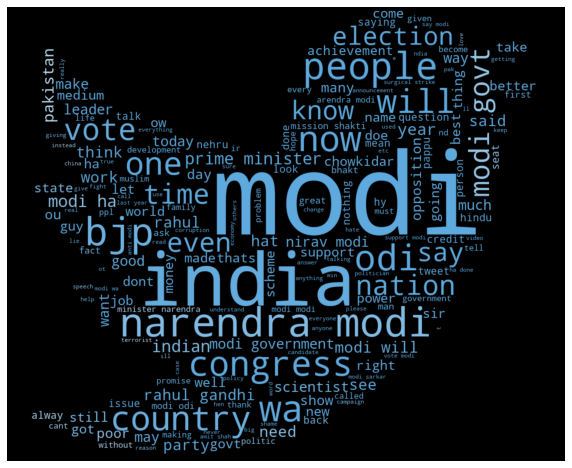

In [5]:
cleandataset['processed_tweets'] = cleandataset['clean_text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(cleandataset)

Text Preprocessing complete.


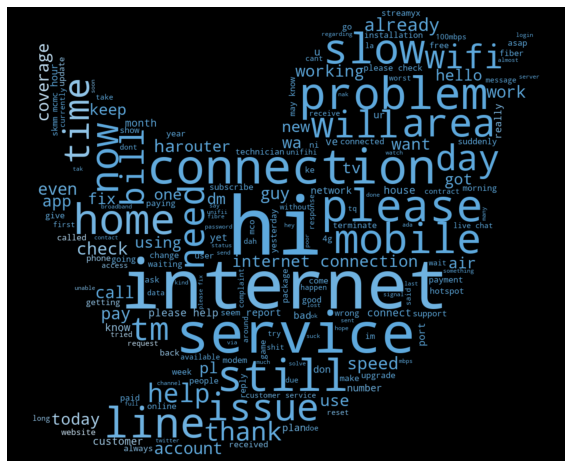

In [6]:
unifi['processed_tweets'] = unifi['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(unifi)

Text Preprocessing complete.


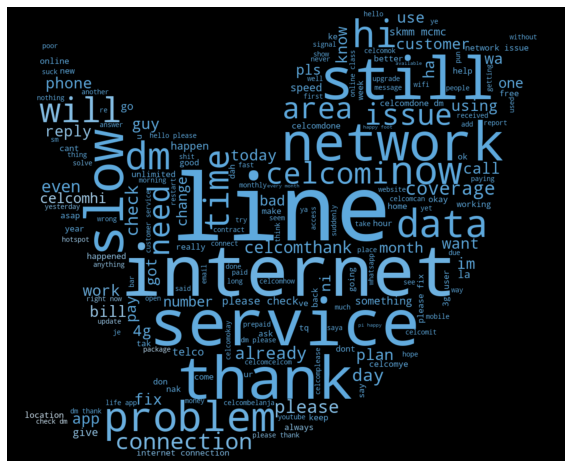

In [40]:
celcom['processed_tweets'] = celcom['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(celcom)

Text Preprocessing complete.


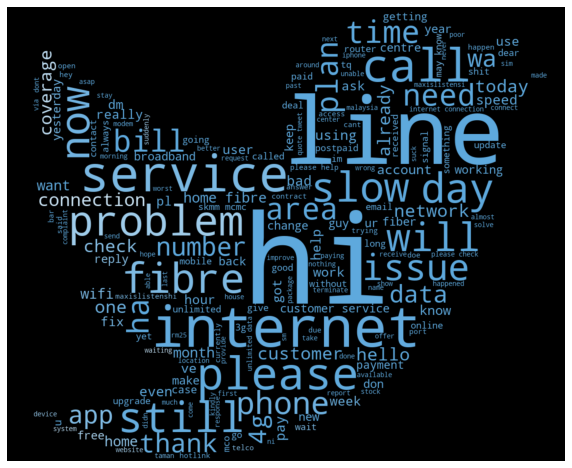

In [41]:
maxis['processed_tweets'] = maxis['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(maxis)

Text Preprocessing complete.


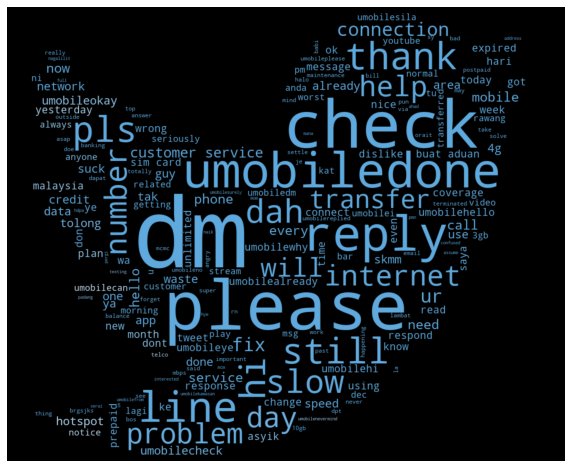

In [9]:
umobile['processed_tweets'] = umobile['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(umobile)

Text Preprocessing complete.


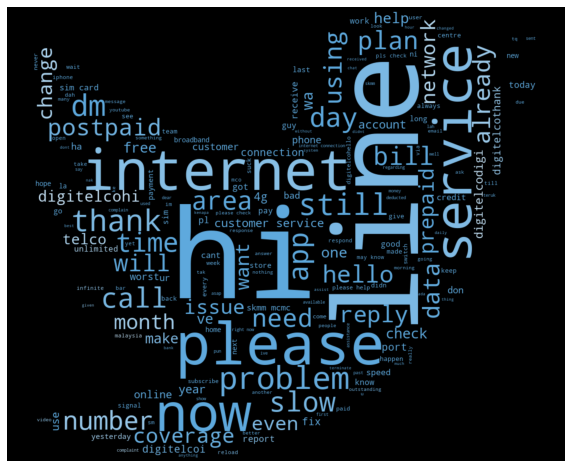

In [42]:
digi['processed_tweets'] = digi['Text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')
wordCloud(digi)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=151, stop_words='english')
text_counts = bow_vectorizer.fit_transform(cleandataset['processed_tweets'].values.astype('U'))
df_bow = pd.DataFrame(text_counts.todense())
df_bow


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Map tweet categories
cleandataset['category'] = cleandataset['category'].map({-1.0:-1, 0.0:0, 1.0:1})
# Output first five rows
cleandataset.head()

,clean_text,category,processed_tweets
0,when modi promised “minimum government maximum...,-1,hen modi promised minimum government maximum g...
1,talk all the nonsense and continue all the dra...,0,alk all the nonsense and continue all the dram...
2,what did just say vote for modi welcome bjp t...,1,hat did just say vote for modi welcome bjp tol...
3,asking his supporters prefix chowkidar their n...,1,sking his supporter prefix chowkidar their nam...
4,answer who among these the most powerful world...,1,nswer who among these the most powerful world ...


In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X=text_counts
y=cleandataset['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100)

print("X_train dataset size: ", X_train.shape)
print("y_train dataset size: ", y_train.shape)

print("Before Oversampling, label '1': ",sum(y_train==1))
print("Before Oversampling, label '-1': ",sum(y_train==-1))
print("Before Oversampling, label '0': ",sum(y_train==0))
print()

smote = SMOTE(random_state=2)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

print("X_smote dataset size: ", X_smote.shape)
print("y_smote dataset size: ", y_smote.shape)

print("After Oversampling, label '1': ",sum(y_smote==1))
print("After Oversampling, label '-1': ",sum(y_smote==-1))
print("After Oversampling, label '0': ",sum(y_smote==0))

X_train dataset size:  (114078, 151)
y_train dataset size:  (114078,)
Before Oversampling, label '1':  50780
Before Oversampling, label '-1':  24799
Before Oversampling, label '0':  38499

X_smote dataset size:  (152340, 151)
y_smote dataset size:  (152340,)
After Oversampling, label '1':  50780
After Oversampling, label '-1':  50780
After Oversampling, label '0':  50780


In [13]:
#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
from sklearn import metrics

def model_report(model, xtest, ytest):
    
    ypred = model.predict(xtest)
    target_names = ['Negative Class', 'Neutral Class', 'Positive Class']
   
    # Print the confusion matrix
    print('\nConfusion Matrix\n')
    print(metrics.confusion_matrix(ytest, ypred))
    # Print the Classification Report
    print('\nClassification Report\n')
    print(classification_report(ytest, ypred, target_names=target_names))

In [14]:
#AUC ROC
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'Neutral', 
                                        -1: 'Negative', 
                                        1: 'Positive'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer



In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_smote, y_smote)
print ("Train accuracy ={:.2f}%".format(mnb.score(X_smote,y_smote)*100))
print ("Test accuracy ={:.2f}%".format(mnb.score(X_test,y_test)*100))

Train accuracy =63.71%
Test accuracy =64.78%


In [23]:
model_report(mnb,X_test,y_test)


Confusion Matrix

[[ 6239  2565  1906]
 [ 3033 12027  1652]
 [ 3661  4403 13405]]

Classification Report

                precision    recall  f1-score   support

Negative Class       0.48      0.58      0.53     10710
 Neutral Class       0.63      0.72      0.67     16712
Positive Class       0.79      0.62      0.70     21469

      accuracy                           0.65     48891
     macro avg       0.64      0.64      0.63     48891
  weighted avg       0.67      0.65      0.65     48891



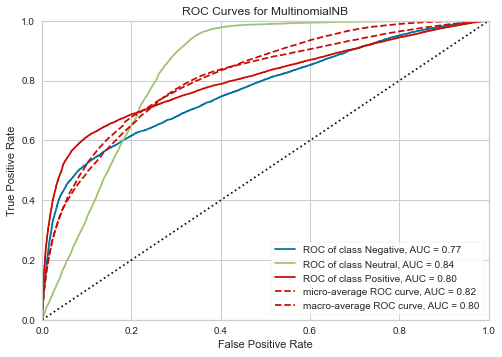

AttributeError: 'MultinomialNB' object has no attribute 'binary'

AttributeError: 'MultinomialNB' object has no attribute 'binary'

In [24]:
plot_ROC_curve(mnb,X_smote, y_smote,X_test,y_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=100)
dct.fit(X_smote, y_smote)
print ("Train accuracy ={:.2f}%".format(dct.score(X_smote, y_smote)*100))
print ("Test accuracy ={:.2f}%".format(dct.score(X_test,y_test)*100))

Train accuracy =92.49%
Test accuracy =62.38%


In [26]:
model_report(dct,X_test,y_test)


Confusion Matrix

[[ 5867  2251  2592]
 [ 3476 10922  2314]
 [ 3839  3919 13711]]

Classification Report

                precision    recall  f1-score   support

Negative Class       0.45      0.55      0.49     10710
 Neutral Class       0.64      0.65      0.65     16712
Positive Class       0.74      0.64      0.68     21469

      accuracy                           0.62     48891
     macro avg       0.61      0.61      0.61     48891
  weighted avg       0.64      0.62      0.63     48891



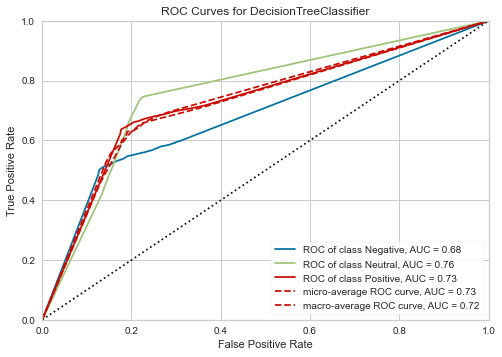

AttributeError: 'DecisionTreeClassifier' object has no attribute 'binary'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'binary'

In [27]:
plot_ROC_curve(dct,X_smote, y_smote,X_test,y_test)

In [28]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_smote, y_smote)
print ("Train accuracy ={:.2f}%".format(clf.score(X_smote, y_smote)*100))
print ("Test accuracy ={:.2f}%".format(clf.score(X_test,y_test)*100))

Train accuracy =78.73%
Test accuracy =67.89%


In [29]:
model_report(clf,X_test,y_test)


Confusion Matrix

[[ 5272  2541  2897]
 [ 2375 12886  1451]
 [ 2058  4375 15036]]

Classification Report

                precision    recall  f1-score   support

Negative Class       0.54      0.49      0.52     10710
 Neutral Class       0.65      0.77      0.71     16712
Positive Class       0.78      0.70      0.74     21469

      accuracy                           0.68     48891
     macro avg       0.66      0.65      0.65     48891
  weighted avg       0.68      0.68      0.68     48891



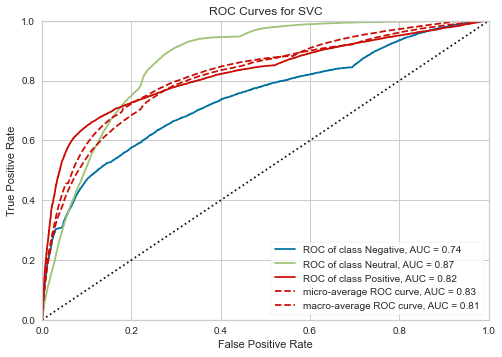

AttributeError: 'SVC' object has no attribute 'binary'

AttributeError: 'SVC' object has no attribute 'binary'

In [30]:
plot_ROC_curve(clf,X_smote, y_smote,X_test,y_test)

In [50]:
from sklearn import svm

lsvm = svm.SVC(kernel = 'linear')
lsvm.fit(X_smote, y_smote)
print("done")
#model_report(lsvm,X_test,y_test)
#456

done


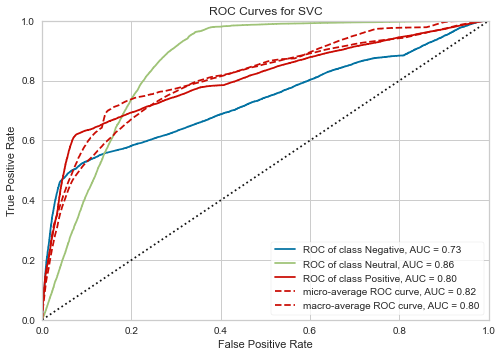

AttributeError: 'SVC' object has no attribute 'binary'

AttributeError: 'SVC' object has no attribute 'binary'

In [32]:
plot_ROC_curve(lsvm,X_smote, y_smote,X_test,y_test)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=750, stop_words='english')
digi_text_counts = bow_vectorizer.fit_transform(digi['processed_tweets'].values.astype('U'))
df_digi = pd.DataFrame(digi_text_counts.todense())
df_digi

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
digipred = lsvm.predict(digi_text_counts)
# add sentiment to df and save as csv
digi['Sentiment'] = digipred.tolist()
digi
#digi.to_csv('digidone.csv')

,UserName,Handle,Timestamp,Text,processed_tweets,Sentiment
0,Melvin David,@melvindavid36,2020-12-28T00:27:23.000Z,"Replying to \r\n@digitelcoHi there, Tq for you...",to digitelcohi there tq for your reply my name...,1
1,sasmitaindra,@rinitamrin,2020-12-26T16:41:12.000Z,"@digitelco\r\n Dear Digi/Digi Business,\r\nI g...",dear business got extremely urgent issue been ...,-1
2,Vijayan Marimuthu,@jayvisel2626,2020-12-25T10:28:14.000Z,"Replying to \r\n@digitelcoAra Sendayan, 70300,...",to digitelcoara sendayan 70300 seremban sembil...,-1
3,EZPZ,@edta_k2,2020-12-24T12:50:03.000Z,@digitelco\r\n come on digi.. fix your signal ...,come on fix your signal in my area ive been po...,0
4,HafizaMNG,@fiza_nez,2020-12-22T03:26:17.000Z,@digitelco\r\n hi.. If i want to change my pos...,hi if want to change my postpaid plan can go t...,1
...,...,...,...,...,...,...
552,LanMud,@roslanmahamud,2020-01-04T15:25:47.000Z,Replying to \r\n@digitelcoWe malaysians pay bi...,to digitelcowe malaysian pay bill for your slo...,-1
553,Mai_Arip,@Maiarip1,2020-01-03T14:08:31.000Z,@digitelco\r\n can i've the estimated time for...,can ve the estimated time for port in from to,0
554,danneyrokka Ladero,@danneyboyladero,2020-01-03T12:38:37.000Z,@digitelco\r\n i've tell u this over n over th...,ve tell this over over that internet become so...,1
555,Sankar Ramakrishnan,@SANKARRamakris,2020-01-03T10:06:21.000Z,Replying to \r\n@digitelco\r\n and \r\n@paanph...,to and paanphantacyi have reloaded rm50 throug...,1


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=750, stop_words='english')
celcom_text_counts = bow_vectorizer.fit_transform(celcom['processed_tweets'].values.astype('U'))
df_celcom = pd.DataFrame(celcom_text_counts.todense())
df_celcom

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
celcompred = lsvm.predict(celcom_text_counts)

# add sentiment to df and save as csv
celcom['Sentiment'] = celcompred.tolist()
celcom.to_csv('celcomdone.csv')

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=750, stop_words='english')
unifi_text_counts = bow_vectorizer.fit_transform(unifi['processed_tweets'].values.astype('U'))
df_unifi = pd.DataFrame(unifi_text_counts.todense())
df_unifi

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
unifipred = lsvm.predict(unifi_text_counts)

# add sentiment to df and save as csv
unifi['Sentiment'] = unifipred.tolist()
#unifi.to_csv('unifidone.csv')
unifi

,UserName,Handle,Timestamp,Text,processed_tweets,Sentiment
0,Abdul Aziz Johari,@abdulazizjoe,2020-12-30T23:25:17.000Z,@helpmeunifi\r\n @unifi\r\n akin lama makin j...,akin lama makin jahanam caj mcm biasa servis m...,0
1,Paris Ashiqin,@ParisAshiqin,2020-12-30T10:57:40.000Z,@unifi\r\n How many times have your CS claimed...,how many time have your c claimed to have rese...,1
2,Mohd Zamri Muhammad,@MohdZamriMuham1,2020-12-30T10:36:41.000Z,@helpmeunifi\r\n still not able to reset my p...,still not able to reset my password for tv plu...,0
3,Fiq.,@wrafiq,2020-12-30T09:23:03.000Z,@helpmeunifi\r\n @unifi\r\n I’ve had no inter...,ve had no internet since xmas your c keep sayi...,-1
4,𝐚𝐦𝐢𝐞𝐫 𝐚𝐳𝐫𝐮𝐥,@amierazrul,2020-12-30T02:38:10.000Z,"@helpmeunifi\r\n hye, could you check my statu...",hye could you check my status of application t...,1
...,...,...,...,...,...,...
2694,Jude Intiang,@ji6619_jude,2020-01-01T09:05:16.000Z,Replying to \r\n@helpmeunifiNo need DM. just r...,to helpmeunifino need dm just reply here and s...,1
2695,Lilac,@itsellinaalia,2020-01-01T05:25:18.000Z,@helpmeunifi\r\n hey i was trying to make paym...,hey wa trying to make payment for my mobile my...,-1
2696,Auzā'ī,@auzaie96,2020-01-01T04:45:41.000Z,@unifi\r\n sucks!!!!,suck,0
2697,Wonderwall,@Manggui,2020-01-01T01:36:12.000Z,@helpmeunifi\r\n i signed up for the unifimobi...,signed up for the unifimobile 59 last month bu...,1


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=750, stop_words='english')
maxis_text_counts = bow_vectorizer.fit_transform(maxis['processed_tweets'].values.astype('U'))
df_maxis = pd.DataFrame(maxis_text_counts.todense())
df_maxis

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
maxispred = lsvm.predict(maxis_text_counts)

# add sentiment to df and save as csv
maxis['Sentiment'] = maxispred.tolist()
maxis.to_csv('maxisdone.csv')

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=750, stop_words='english')
umobile_text_counts = bow_vectorizer.fit_transform(umobile['processed_tweets'].values.astype('U'))

df_umobile = pd.DataFrame(umobile_text_counts.todense())
df_umobile
#print(umobile_text_counts)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
umobilepred = lsvm.predict(umobile_text_counts)
# add sentiment to df and save as csv
umobile['Sentiment'] = umobilepred.tolist()
umobile
umobile.to_csv('umobiledone.csv')